##  Project Objective

Netflix is one of the world's leading streaming platforms, hosting thousands of movies and TV shows globally.  
This project aims to analyze Netflix’s content library to uncover insights about its growth, content distribution, and audience strategy.

### Key Objectives:
- Clean and preprocess Netflix dataset for analysis  
- Explore trends across countries, content types, and years  
- Visualize popular genres, directors, and ratings  
- Draw insights on how Netflix’s catalog evolved over time  

**Dataset:** Netflix Movies & TV Shows (2008–2021)  
**Tools Used:** Python (Pandas, Matplotlib, Seaborn, WordCloud)


## Importing Libraries & Dataset

We start by importing essential Python libraries for data cleaning, exploration, and visualization.  
Then we load the dataset and preview the first few rows to understand its structure.


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
df = pd.read_csv('netflix1.csv')

In [14]:
df.head(10)

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"
5,s9,TV Show,The Great British Baking Show,Andy Devonshire,United Kingdom,9/24/2021,2021,TV-14,9 Seasons,"British TV Shows, Reality TV"
6,s10,Movie,The Starling,Theodore Melfi,United States,9/24/2021,2021,PG-13,104 min,"Comedies, Dramas"
7,s939,Movie,Motu Patlu in the Game of Zones,Suhas Kadav,India,5/1/2021,2019,TV-Y7,87 min,"Children & Family Movies, Comedies, Music & Mu..."
8,s13,Movie,Je Suis Karl,Christian Schwochow,Germany,9/23/2021,2021,TV-MA,127 min,"Dramas, International Movies"
9,s940,Movie,Motu Patlu in Wonderland,Suhas Kadav,India,5/1/2021,2013,TV-Y7,76 min,"Children & Family Movies, Music & Musicals"


##Data Cleaning

Before performing analysis, we ensure the dataset is free of duplicates, missing values, and inconsistent formats.

**Cleaning Steps:**
1. Removed duplicate rows  
2. Filled or labeled missing values (e.g., missing directors/countries as “Not Given”)  
3. Converted `date_added` into a `datetime` object  
4. Extracted `year`, `month`, and `day` from the date  
5. Checked for consistency in numeric and categorical fields

In [15]:
df = df.drop('show_id', axis=1)

In [16]:
df.shape

(8790, 9)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          8790 non-null   object
 1   title         8790 non-null   object
 2   director      8790 non-null   object
 3   country       8790 non-null   object
 4   date_added    8790 non-null   object
 5   release_year  8790 non-null   int64 
 6   rating        8790 non-null   object
 7   duration      8790 non-null   object
 8   listed_in     8790 non-null   object
dtypes: int64(1), object(8)
memory usage: 618.2+ KB


In [18]:
df.isnull().sum()

,0
type,0
title,0
director,0
country,0
date_added,0
release_year,0
rating,0
duration,0
listed_in,0


In [19]:
#Convert date object to date and time
df['date_added'] = pd.to_datetime(df['date_added'])

In [20]:
df['Year'] = df['date_added'].dt.year
df['Month'] = df['date_added'].dt.month
df['Day'] = df['date_added'].dt.day

In [21]:
#Droping duplicates
df.drop_duplicates(inplace=True)

In [22]:
df['decade'] = (df['release_year'] // 10) * 10

In [23]:
df['country'] = df['country'].fillna(df['country'].mode()[0])

In [24]:
df['director'].value_counts().sort_values(ascending=False).head(10)

,count
director,
Not Given,2587
Rajiv Chilaka,20
Alastair Fothergill,18
"Raúl Campos, Jan Suter",18
Marcus Raboy,16
Suhas Kadav,16
Jay Karas,14
Cathy Garcia-Molina,13
Jay Chapman,12


In [25]:
df['director'] = df['director'].replace('Not Given', np.nan)

In [26]:
df['director'] = df['director'].fillna('Unknown')

In [27]:
#No. of unique directors are there
df['director'].nunique()

4528

In [28]:
#Create 'decade' if not present
if 'decade' not in df.columns:
    df['decade'] = (df['release_year'] // 10) * 10


In [29]:
#Create 'title_length' if not present
if 'title_length' not in df.columns:
    df['title_length'] = df['title'].apply(len)


##Exploratory Data Analysis (EDA)

The exploratory phase focuses on understanding:
- The balance between Movies vs TV Shows  
- Distribution of ratings and genres  
- Growth trends over time  
- Countries and directors dominating the platform


###Correlation


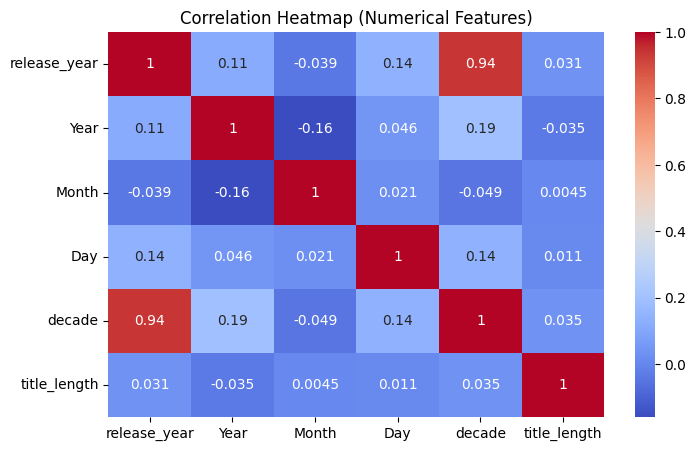

In [30]:
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap (Numerical Features)")
plt.show()

**Correlation Insights**

Although most columns are categorical, we can still observe relationships in numeric fields like `release_year`.

There’s a steady increase in newer releases over time, confirming Netflix’s focus on modern content acquisition.


####Top Directors on Netflix

In [31]:
df['director'].value_counts().sort_values(ascending=False).head(10)

,count
director,
Unknown,2587
Rajiv Chilaka,20
Alastair Fothergill,18
"Raúl Campos, Jan Suter",18
Marcus Raboy,16
Suhas Kadav,16
Jay Karas,14
Cathy Garcia-Molina,13
Jay Chapman,12


/tmp/ipython-input-2155339761.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_directors.index, y=top_10_directors.values, palette='Blues_d')


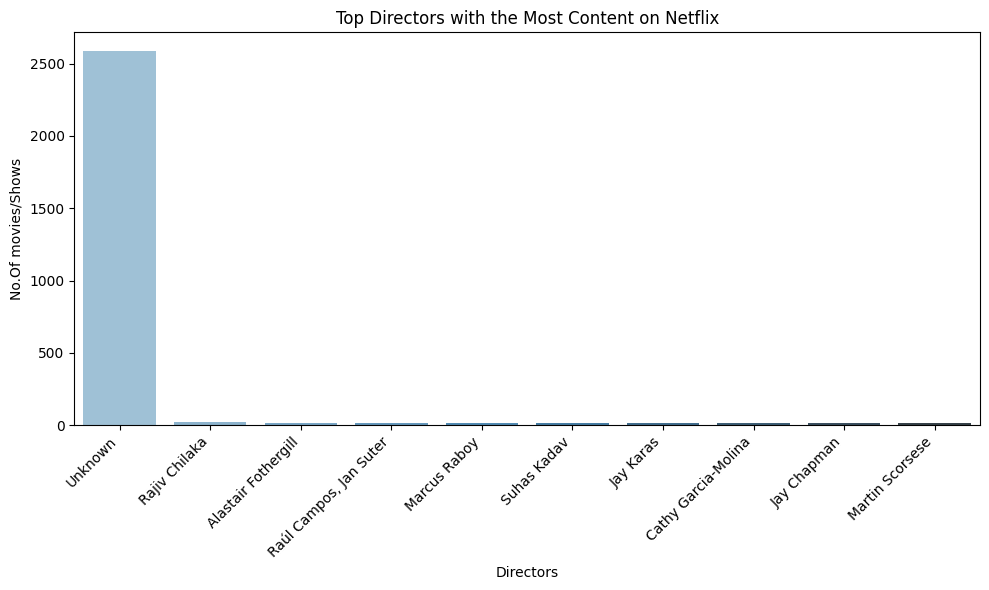

In [32]:
#The top 10 directors with the most titles
top_10_directors = df['director'].value_counts().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_directors.index, y=top_10_directors.values, palette='Blues_d')
plt.title('Top Directors with the Most Content on Netflix')
plt.ylabel('No.Of movies/Shows')
plt.xlabel('Directors')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Insight:**  
Directors like **Rajiv Chilaka**, **Alastair Fothergill**, and **Martin Scorsese** have contributed significantly to Netflix content,  
highlighting a blend of Indian animation, documentaries, and cinematic originals.

In [33]:
#Movie or TV show has the longest title
df['title_length'] = df['title'].apply(len)
df.groupby('title')['title_length'].max().sort_values(ascending=False).head(5)

,title_length
title,
"Jim & Andy: The Great Beyond - Featuring a Very Special, Contractually Obligated Mention of Tony Clifton",104
Ken Burns Presents: College Behind Bars: A Film by Lynn Novick and Produced by Sarah Botstein,93
Mike Birbiglia: What I Should Have Said Was Nothing: Tales from My Secret Public Journal,88
The Power of Grayskull: The Definitive History of He-Man and the Masters of the Universe,88
Steve Martin and Martin Short: An Evening You Will Forget for the Rest of Your Life,83


###Common Rating

/tmp/ipython-input-1309471158.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rating_counts.index, y=rating_counts.values, palette='viridis')


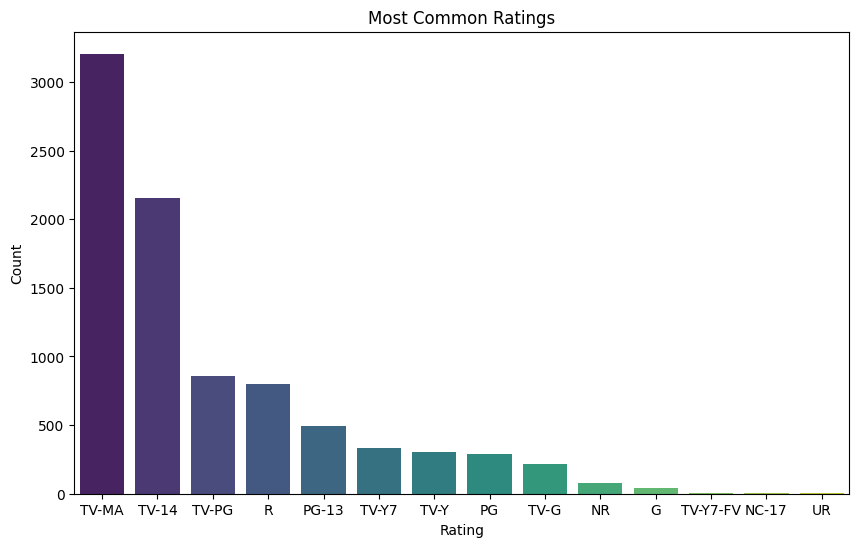

In [34]:
#The most common ratings.
plt.figure(figsize=(10, 6))
rating_counts = df['rating'].value_counts()
sns.barplot(x=rating_counts.index, y=rating_counts.values, palette='viridis')
plt.title('Most Common Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

**Visual Insight:**  
The bar chart shows that `TV-MA` dominates Netflix’s catalog, followed by `TV-14`.  
These categories align with the content style Netflix is best known for — darker dramas, crime thrillers, and mature comedies.


###Titles added over years

In [35]:
#All the titles released in the year 2020
df[df['release_year'] == 2020]['title']


,title
0,Dick Johnson Is Dead
25,Europe's Most Dangerous Man: Otto Skorzeny in ...
36,Tayo and Little Wizards
47,Bread Barbershop
58,The Smart Money Woman
...,...
7484,Maradona in Mexico
7517,BoJack Horseman
7537,The Hook Up Plan
8685,Super Wings


Text(0, 0.5, 'No of Titles')

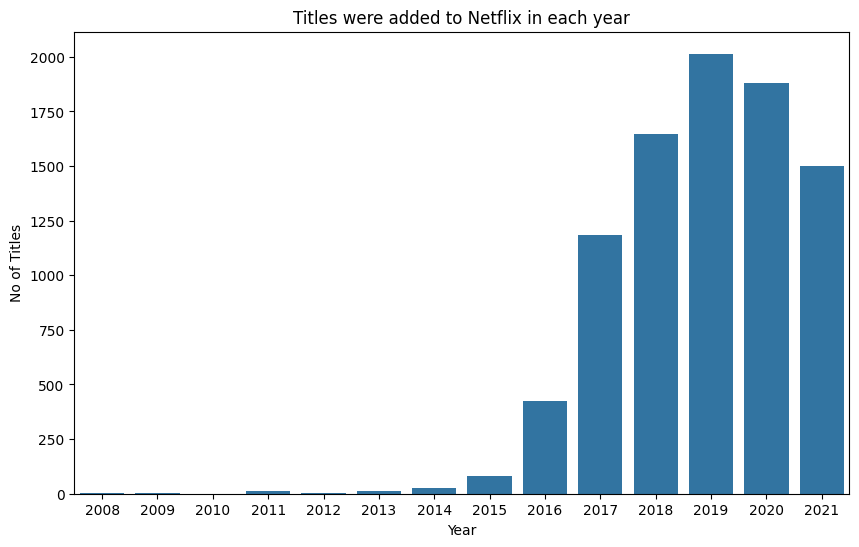

In [36]:
#Titles were added to Netflix in each year?
titles=df['date_added'].dt.year.value_counts().sort_index()
plt.figure(figsize=(10,6))
sns.barplot(x=titles.index,y=titles.values)
plt.title('Titles were added to Netflix in each year')
plt.xlabel('Year')
plt.ylabel('No of Titles')

**Insights:**

1️.Netflix’s content library grew rapidly after 2016, peaking around 2019–2020 — reflecting its global expansion and surge in original productions.

2️. The slight slowdown after 2020 suggests a strategic shift toward quality content and pandemic-related production delays.

###Top Countries by Content

Let’s identify which countries contribute the most content to Netflix’s library.


/tmp/ipython-input-4286558526.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.index, y=top_countries.values, palette='viridis', hue=None)


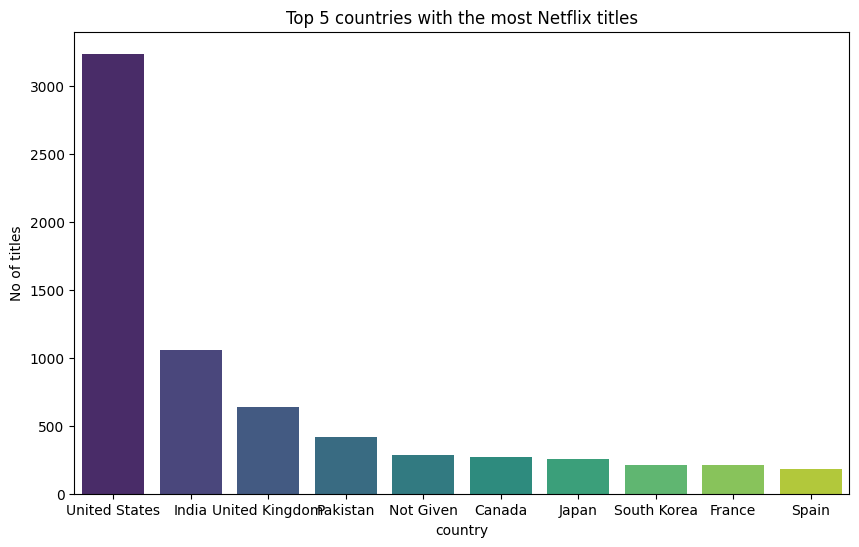

In [37]:
#The top 10 countries with the most Netflix titles
plt.figure(figsize=(10, 6))
top_countries = df['country'].value_counts().sort_values(ascending=False).head(10)
sns.barplot(x=top_countries.index, y=top_countries.values, palette='viridis', hue=None)
plt.title('Top 5 countries with the most Netflix titles')
plt.xlabel('country')
plt.ylabel('No of titles')
plt.show()

**Insight:**  
The **United States** and **India** dominate the platform, together contributing more than 45% of total titles.  
This showcases Netflix’s strong base in Hollywood and its aggressive expansion in Indian markets.


<function matplotlib.pyplot.ylabel(ylabel: 'str', fontdict: 'dict[str, Any] | None' = None, labelpad: 'float | None' = None, *, loc: "Literal['bottom', 'center', 'top'] | None" = None, **kwargs) -> 'Text'>

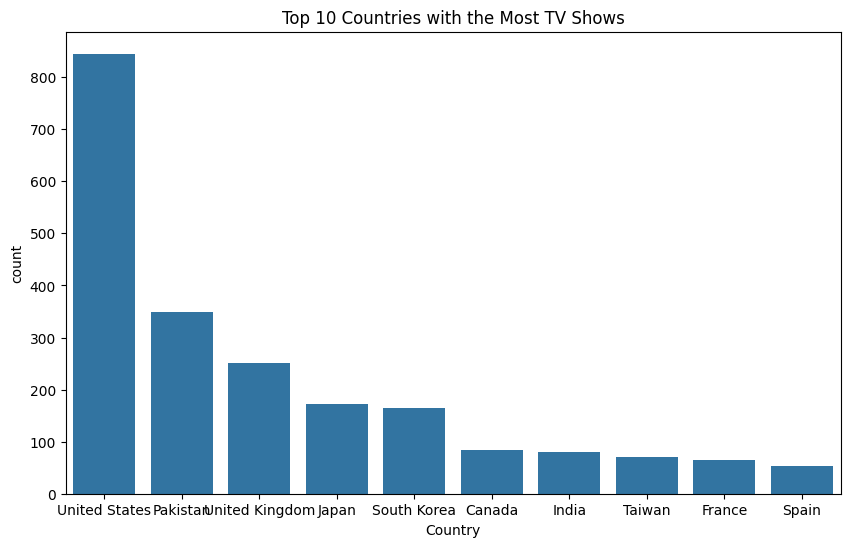

In [38]:
#Which country produces the most TV Shows
tv_shows = df[df['type'] == 'TV Show']
country_tv_counts = tv_shows['country'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=country_tv_counts.index, y=country_tv_counts)
plt.title('Top 10 Countries with the Most TV Shows')
plt.xlabel('Country')
plt.ylabel

###Popular Genres on Netflix

Genres define audience preferences and streaming trends.

/tmp/ipython-input-4088056635.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='Set3')


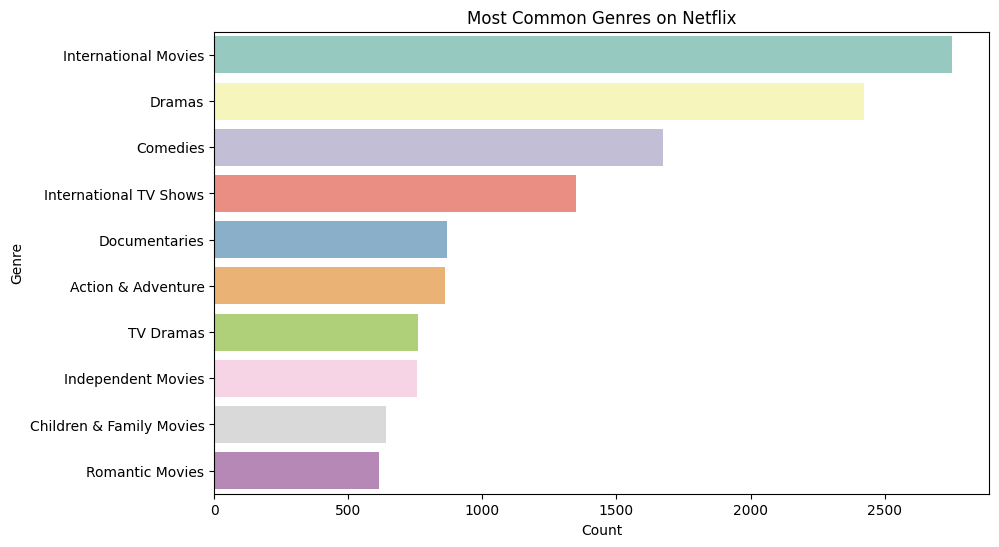

In [39]:
#Most Common Genres on netflix
df['genres'] = df['listed_in'].apply(lambda x: x.split(', '))
all_genres = sum(df['genres'], [])
genre_counts = pd.Series(all_genres).value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='Set3')
plt.title('Most Common Genres on Netflix')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

In [40]:
df['genre_count'] = df['genres'].apply(len)

In [41]:
#Find the average duration of Movies
movies_df = df[df['type'] == 'Movie'].copy()

# Ensure all duration values are strings before applying .str
movies_df['duration'] = movies_df['duration'].astype(str)

# Remove ' min' text and convert to float safely
movies_df['duration_min'] = (
    movies_df['duration']
    .str.replace(' min', '', regex=False)
    .str.extract('(\d+)')
    .astype(float)
)
average_duration = movies_df['duration_min'].mean()
print("Average movie duration:", round(average_duration, 2), "minutes")


Average movie duration: 99.57 minutes


<>:11: SyntaxWarning: invalid escape sequence '\d'
<>:11: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipython-input-3281225798.py:11: SyntaxWarning: invalid escape sequence '\d'
  .str.extract('(\d+)')


**Insight:**  
Dramas, Comedies, and Documentaries dominate Netflix’s catalog, followed by Crime and International genres.  
This mix shows Netflix’s balance between entertainment and thought-provoking storytelling.


Text(0, 0.5, 'No of Titles')

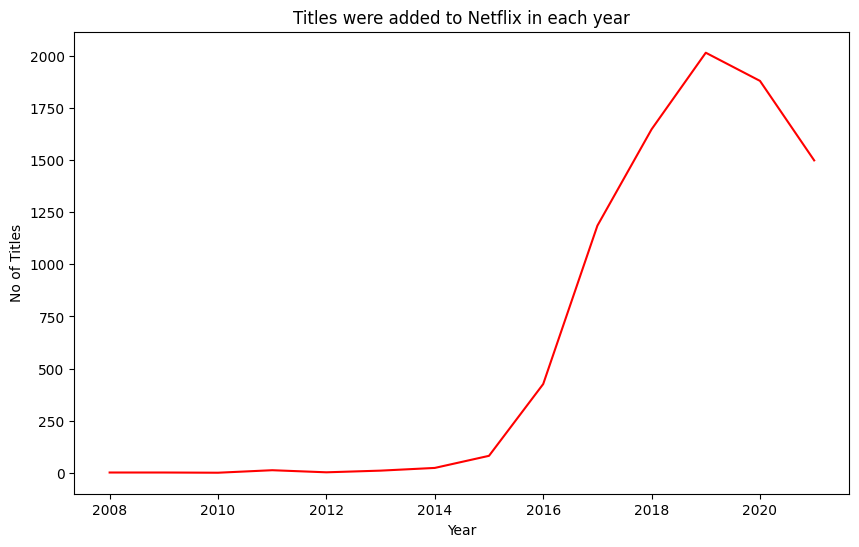

In [42]:
plt.figure(figsize=(10, 6))
sns.lineplot(x = titles.index, y = titles.values, color = 'red')
plt.title('Titles were added to Netflix in each year')
plt.xlabel('Year')
plt.ylabel('No of Titles')

###Movies vs TV Shows

Netflix hosts a large variety of movies and TV shows.  
Let’s see the distribution of both content types.


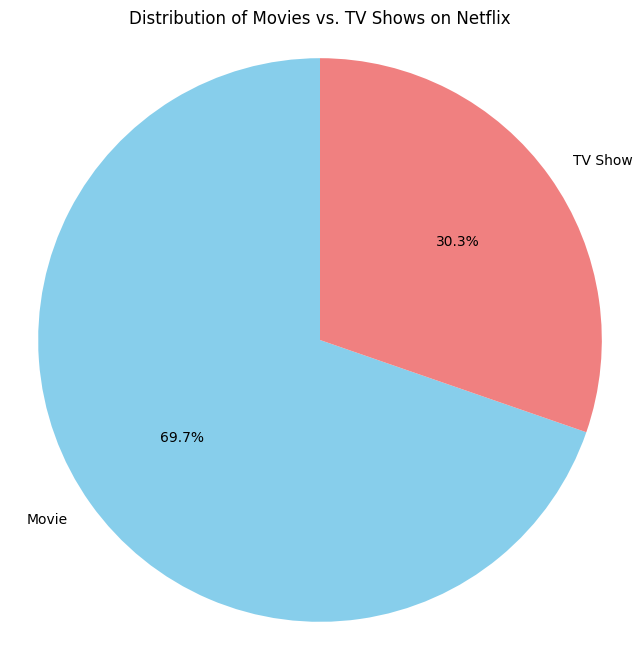

In [43]:
type_counts = df['type'].value_counts()
# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Distribution of Movies vs. TV Shows on Netflix')
plt.axis('equal')
plt.show()

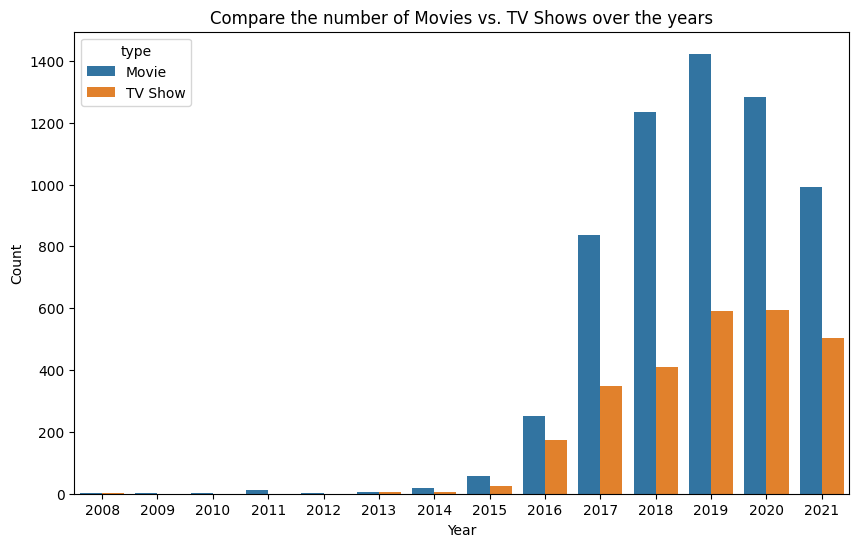

In [44]:
#Compare the number of Movies vs. TV Shows over the years
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x=df['date_added'].dt.year, hue='type')
plt.title('Compare the number of Movies vs. TV Shows over the years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

**Insight:**  
Movies make up roughly 70% of Netflix’s catalog, while TV Shows account for the remaining 30%.  
This indicates that Netflix still focuses heavily on one-time watchable content, though TV content is growing steadily.


## Wordcloud

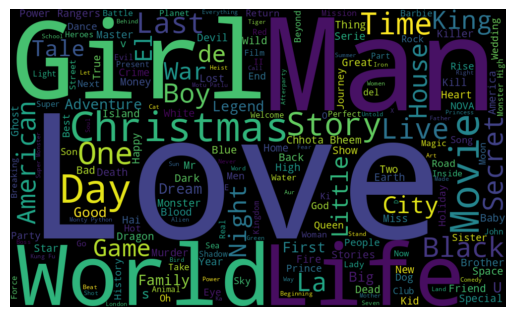

In [45]:
from wordcloud import WordCloud
text = ' '.join(df['title'])
wc = WordCloud(width=1000, height=600, background_color='black').generate(text)
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

### ☁️ Common Words in Netflix Titles

**Insight:**  
Words like *Love, Life, Story, World,* and *Time* frequently appear,  
indicating storytelling themes centered around emotion, drama, and human experience.

##ML extension

In [46]:
#Encode 'type' (Movie/TV Show) as binary
df['type_encoded'] = df['type'].map({'Movie': 0, 'TV Show': 1})

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
# Define features (X) and target (y)
# Use numerical features and the one-hot encoded 'rating' features
features = ['release_year', 'title_length', 'decade', 'genre_count'] + \
           [col for col in df.columns if col.startswith('rating_')]
y = df['type_encoded']
X = df[features]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the Logistic Regression model
model = LogisticRegression(max_iter=1000) # Increased max_iter for convergence
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Logistic Regression Model Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Logistic Regression Model Performance:
Accuracy: 0.71
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.97      0.82      1861
           1       0.54      0.10      0.16       776

    accuracy                           0.71      2637
   macro avg       0.63      0.53      0.49      2637
weighted avg       0.67      0.71      0.63      2637



#Exporting


In [48]:
df.to_csv('netflix_cleaned.csv', index=False)